## Objective: 
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

The any() method returns one value for each column, True if ANY value in that column is True, otherwise False.

In [7]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [12]:
col = list(data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = col

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

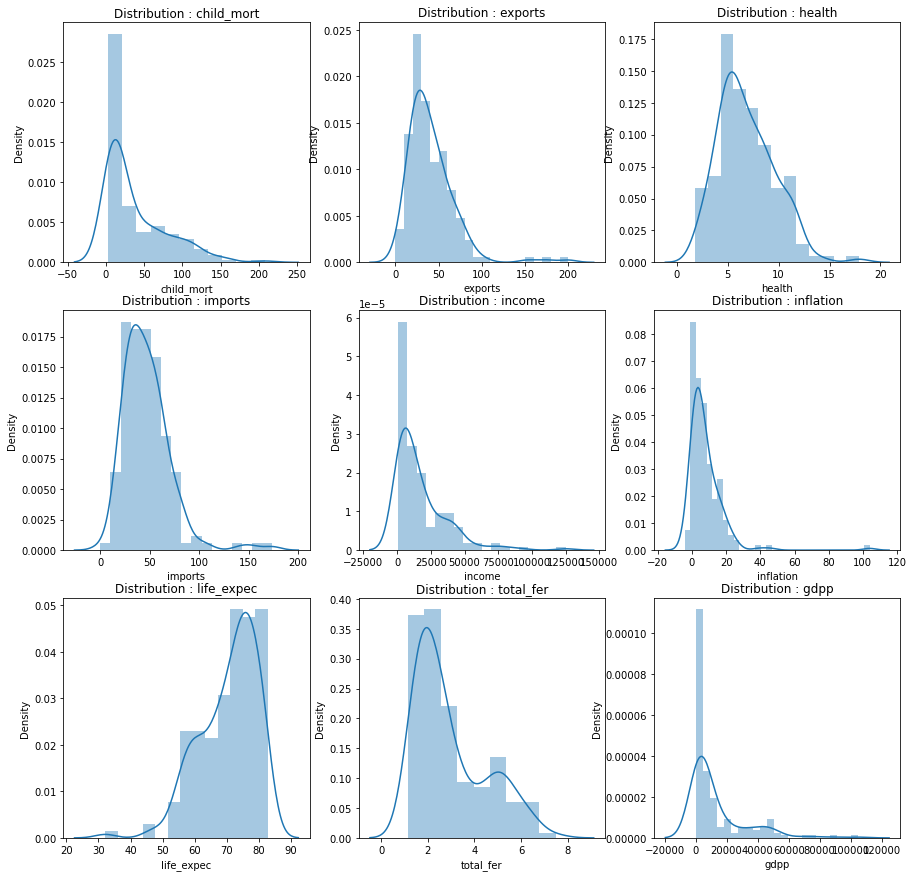

In [14]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

In [15]:
df2 = data.copy(deep = True)
df2.drop('country',axis = 1, inplace = True)

In [16]:
df2.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


## Visualizing the correlation between variable

In [17]:
corrm = np.corrcoef(df2.T)
corrm.shape

(9, 9)

In [18]:
lt = np.tril(corrm)

In [19]:
cols = list(df2.columns)
cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

<AxesSubplot:>

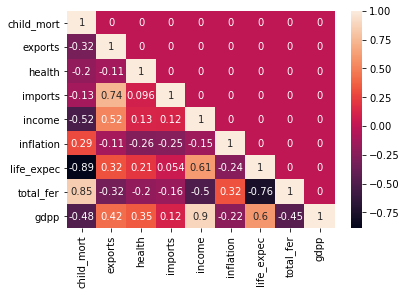

In [20]:
sns.heatmap(lt,annot = True, xticklabels = cols, yticklabels = cols)

## Normalizing
Normalizing the data to pass to PCA

In [22]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
sc = StandardScaler() # Standardization

col = list(df2.columns)
col.remove('health')

df2['health'] = sc.fit_transform(df2[['health']]) 

for i in col:
    df2[i] = mms.fit_transform(df2[[i]])  
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.279088,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,-0.097016,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,-0.966073,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,-1.448071,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,-0.286894,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [23]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.82400771, 0.93002846, 0.95797053, 0.97967471, 0.98760983,
       0.99411664, 0.99660352, 0.99854711, 1.        ])

As you can see, more than 95 % variance is being captured by the first 3 principal components. So, we'll drop the remaining principal components

In [25]:
pca_df2

,0,1,2,3,4,5,6,7,8
0,0.220482,0.640048,0.086112,0.051960,-0.037643,-0.058159,0.075908,0.043013,0.024713
1,-0.080903,-0.172000,-0.208695,-0.086004,0.015168,-0.010271,-0.043997,0.028919,0.031093
2,-0.961283,-0.125199,-0.126719,0.052972,-0.099536,0.031897,-0.045097,-0.013591,0.003077
3,-1.505914,0.472144,0.284978,0.073150,-0.091937,0.040967,-0.072901,-0.047963,-0.043372
4,-0.264724,-0.237308,-0.059150,-0.078788,-0.032929,-0.056938,-0.009745,0.023846,0.023683
...,...,...,...,...,...,...,...,...,...
162,-0.584662,0.089055,-0.023372,-0.114258,-0.006163,-0.061840,0.115437,-0.000665,-0.065666
163,-0.689176,-0.151368,-0.165444,0.182571,-0.119601,0.297074,0.003919,0.061455,-0.034761
164,0.012693,-0.123744,-0.023656,-0.300533,-0.041350,0.086888,-0.039976,-0.004058,-0.018238
165,-0.628317,0.259154,-0.017196,0.075314,-0.148962,0.059920,0.012153,0.015505,-0.010963


In [26]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head()

,0,1,2
0,0.220482,0.640048,0.086112
1,-0.080903,-0.172000,-0.208695
2,-0.961283,-0.125199,-0.126719
3,-1.505914,0.472144,0.284978
4,-0.264724,-0.237308,-0.059150


## Clustering the dataset

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


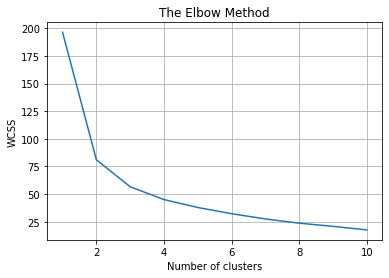

In [44]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 2)
    kmeans.fit(pca_df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [45]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(pca_df2)
print(y_kmeans)

[2 2 0 0 2 2 0 2 1 0 2 0 0 2 0 1 0 0 0 0 1 2 2 0 2 2 1 0 0 1 0 0 0 2 0 2 0
 2 0 1 0 2 2 2 1 2 2 0 2 0 0 2 0 2 1 0 0 1 1 0 1 0 2 0 2 0 2 2 1 0 0 0 2 1
 2 1 0 1 2 0 0 1 0 2 0 2 2 1 1 0 2 2 2 0 2 0 2 0 2 0 2 1 1 0 2 0 0 0 2 0 1
 1 0 0 1 0 0 2 0 0 0 2 1 0 0 0 1 2 0 0 1 0 1 0 2 1 2 2 2 1 0 0 2 2 1 1 0 0
 0 2 2 0 2 2 0 2 2 0 1 1 2 0 0 0 2 0 0]


In [46]:
data['Class'] = y_kmeans
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


Text(0.5, 1.0, 'child_mort vs Class')

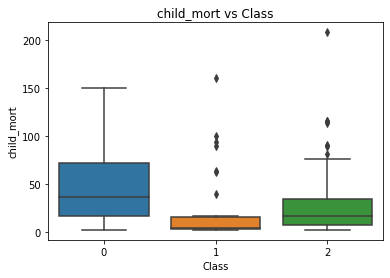

In [52]:
sns.boxplot(x = 'Class', y = 'child_mort', data  = data);
plt.title('child_mort vs Class')

In [51]:
data[data['Class'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,1
15,Belgium,4.5,76.40,10.70,74.7,41100,1.880,80.0,1.86,44400,1
20,Bosnia and Herzegovina,6.9,29.70,11.10,51.3,9720,1.400,76.8,1.31,4610,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
29,Canada,5.6,29.10,11.30,31.0,40700,2.870,81.3,1.63,47400,1
39,Costa Rica,10.2,33.20,10.90,35.0,13000,6.570,80.4,1.92,8200,1
44,Denmark,4.1,50.50,11.40,43.6,44000,3.220,79.5,1.87,58000,1
54,France,4.2,26.80,11.90,28.1,36900,1.050,81.4,2.03,40600,1
57,Georgia,16.5,35.00,10.10,52.8,6730,8.550,72.8,1.92,2960,1
58,Germany,4.2,42.30,11.60,37.1,40400,0.758,80.1,1.39,41800,1


In [55]:
Verdict = {0: 'Needs help', 1: 'No help needed', 2: 'Might need help'}
data['Verdict'] = data['Class'].map(Verdict)

In [56]:
data.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class,Verdict
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2,Might need help
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2,Might need help
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0,Needs help
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0,Needs help
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2,Might need help
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2,Might need help
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0,Needs help
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2,Might need help
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1,No help needed
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0,Needs help
